In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d tauilabdelilah/mrl-eye-dataset

Dataset URL: https://www.kaggle.com/datasets/tauilabdelilah/mrl-eye-dataset
License(s): unknown
100% 330M/330M [00:11<00:00, 40.0MB/s]
100% 330M/330M [00:11<00:00, 29.1MB/s]


In [3]:
!unzip mrl-eye-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/train/open eyes/s0036_05431_1_1_1_0_0_01.png  
  inflating: data/train/open eyes/s0036_05432_1_1_1_0_0_01.png  
  inflating: data/train/open eyes/s0036_05433_1_1_1_0_0_01.png  
  inflating: data/train/open eyes/s0036_05434_1_1_1_0_0_01.png  
  inflating: data/train/open eyes/s0036_05435_1_1_1_0_0_01.png  
  inflating: data/train/open eyes/s0036_05436_1_1_1_0_0_01.png  
  inflating: data/train/open eyes/s0036_05437_1_1_1_0_0_01.png  
  inflating: data/train/open eyes/s0036_05438_1_1_1_0_0_01.png  
  inflating: data/train/open eyes/s0036_05439_1_1_1_0_0_01.png  
  inflating: data/train/open eyes/s0036_05440_1_1_1_0_0_01.png  
  inflating: data/train/open eyes/s0036_05441_1_1_1_0_0_01.png  
  inflating: data/train/open eyes/s0036_05442_1_1_1_0_0_01.png  
  inflating: data/train/open eyes/s0036_05443_1_1_1_0_0_01.png  
  inflating: data/train/open eyes/s0036_05444_1_1_1_0_0_01.png  
  inflating: data/train/open eyes/s0036

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
datagen = ImageDataGenerator(
    rescale=1.0/255,        # Normalize pixel values to [0, 1]
    rotation_range=40,      # Rotate images up to 40 degrees
    width_shift_range=0.2,  # Shift the width of images by up to 20%
    height_shift_range=0.2, # Shift the height of images by up to 20%
    shear_range=0.2,        # Shear angle in counter-clockwise direction as radians
    zoom_range=0.2,         # Zoom in by up to 20%
    horizontal_flip=True,   # Randomly flip images horizontally
    fill_mode='nearest'     # How to fill in new pixels when images are rotated or shifted
)


In [6]:
train_data=datagen.flow_from_directory(
    "/content/data/train",
    target_size=(80,80),
    batch_size=8,
    class_mode="binary"
)
validation_datagen=ImageDataGenerator(rescale=1.0/255)
validation_data=validation_datagen.flow_from_directory(
    "/content/data/test",
    target_size=(80,80),
    batch_size=8,
    class_mode="binary"
)

Found 81675 images belonging to 2 classes.
Found 3223 images belonging to 2 classes.


In [23]:
model=Sequential()
model.add(Conv2D(50,kernel_size=(3,3),activation="relu",input_shape=(80, 80, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(30,kernel_size=(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(60,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(10,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1,activation="sigmoid"))

In [24]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 78, 78, 50)          │           1,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 78, 78, 50)          │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 39, 39, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 37, 37, 30)          │          13,530 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 37, 37, 30)          │             120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 18, 18, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 9720)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 60)                  │         583,260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 60)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             610 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 599,131 (2.29 MB)

 Trainable params: 598,971 (2.28 MB)

 Non-trainable params: 160 (640.00 B)

In [26]:
history=model.fit(
  train_data,epochs=12,
  validation_data=validation_data,
  steps_per_epoch=train_data.samples//train_data.batch_size,
  validation_steps=validation_data.samples//validation_data.batch_size)

Epoch 1/12
10209/10209 ━━━━━━━━━━━━━━━━━━━━ 239s 23ms/step - accuracy: 0.6371 - loss: 0.8277 - val_accuracy: 0.8150 - val_loss: 0.4913
Epoch 2/12
10209/10209 ━━━━━━━━━━━━━━━━━━━━ 0s 20us/step - accuracy: 0.6250 - loss: 0.5154 - val_accuracy: 0.2857 - val_loss: 0.9972
Epoch 3/12
10209/10209 ━━━━━━━━━━━━━━━━━━━━ 250s 25ms/step - accuracy: 0.8460 - loss: 0.3620 - val_accuracy: 0.6549 - val_loss: 0.6322
Epoch 4/12
10209/10209 ━━━━━━━━━━━━━━━━━━━━ 2s 240us/step - accuracy: 1.0000 - loss: 0.1449 - val_accuracy: 0.2857 - val_loss: 0.7412
Epoch 5/12
10209/10209 ━━━━━━━━━━━━━━━━━━━━ 248s 23ms/step - accuracy: 0.9033 - loss: 0.2549 - val_accuracy: 0.7606 - val_loss: 0.5825
Epoch 6/12
10209/10209 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step - accuracy: 0.8750 - loss: 0.1825 - val_accuracy: 0.7143 - val_loss: 1.4208
Epoch 7/12
10209/10209 ━━━━━━━━━━━━━━━━━━━━ 261s 23ms/step - accuracy: 0.9225 - loss: 0.2133 - val_accuracy: 0.8806 - val_loss: 0.2974
Epoch 8/12
10209/10209 ━━━━━━━━━━━━━━━━━━━━ 0s 46us/step - ac

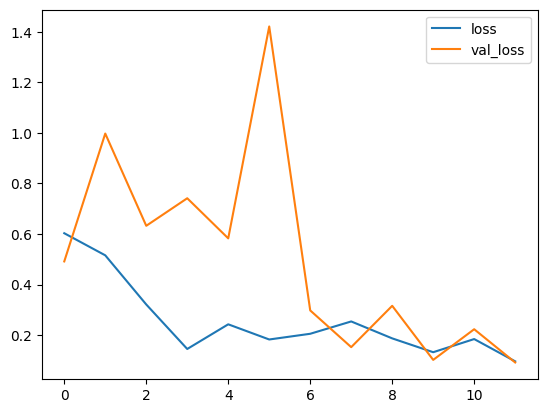

In [27]:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.legend()

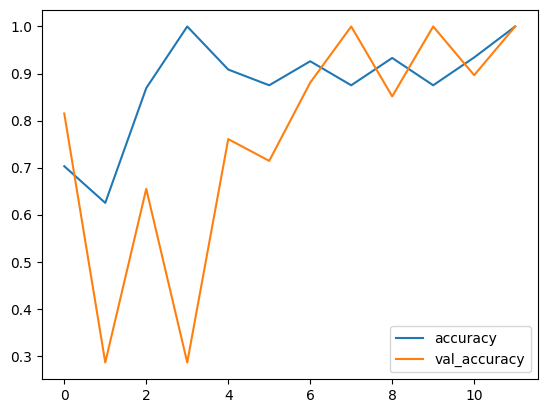

In [28]:
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.legend()

In [29]:
model.save("final_model.h5")